# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
!pip install citipy
# Dependencies

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from citipy import citipy
from scipy.stats import linregress


# Import API key
from api_keys import g_key
from api_keys import weather_api_key

lat_range=(-90,90)
long_range=(-180,180)

## Generate Cities List

In [37]:
cities=[]
coordinates=[]

latitudes=np.random.uniform(low=-90.000, high=90.000, size=1500)

longitudes=np.random.uniform(low=-180.000, high=180.000, size=1500)

coordinates=zip(latitudes,longitudes)

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities: 
        cities.append(city)

        
len(cities)
        


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
target_url='http://api.openweathermap.org/data/2.5/weather?'+'appid='+ weather_api_key +'&units=imperial'+'&q='
print(target_url)

city_count=1
count=1

city_list=[]
#country=[]
#city_name=[]
#max_temps=[]
#humidity=[]
#cloudiness=[]
#wind_speed=[]

#latitude=[]
#longitude=[]
#date=[]

print("Now searching for cities")

for city in cities:
    response=requests.get(target_url + city)
    response_json=response.json()
    city_count+=1
    

    try:
      
        max_temp = response_json["main"]["temp_max"]
        humidity=response_json["main"]["humidity"]
        cloudiness=response_json["clouds"]["all"]
        wind_speed=response_json["wind"]["speed"]
        country=response_json["sys"]["country"]
        city_name=response_json["name"]
        latitude=response_json["coord"]["lat"]
        longitude=response_json["coord"]["lon"]
        date=response_json["dt"]
        
        
        city_list.append({
            "City":city_name,
            "Lat":latitude,
            "Lng":longitude,
            "Max Temp":max_temp,
            "Humidity":humidity,
            "Cloudiness":cloudiness,
            "Wind Speed":wind_speed,
            "Country":country,
            "Date":date
            
        })
              


        print(f" City processed {city_count} of set{count}|{city}")
        #if city_count>10:
            #break
        
    except:
        print("City was not found. Skipping to next")
        pass
    
    
        
        
        

http://api.openweathermap.org/data/2.5/weather?appid=fc8f709794218cc02ae2f5014da83c02&units=imperial&q=
Now searching for cities
 City processed 2 of set1|saint-pierre
 City processed 3 of set1|saskylakh
 City processed 4 of set1|srednekolymsk
 City processed 5 of set1|yellowknife
 City processed 6 of set1|ushuaia
 City processed 7 of set1|marienburg
 City processed 8 of set1|kavaratti
 City processed 9 of set1|gat
 City processed 10 of set1|ribeira grande
 City processed 11 of set1|tahta
 City processed 12 of set1|yatou
 City processed 13 of set1|bengkulu
 City processed 14 of set1|atuona
 City processed 15 of set1|prince rupert
 City processed 16 of set1|mulege
 City processed 17 of set1|abha
 City processed 18 of set1|rikitea
 City processed 19 of set1|provideniya
City was not found. Skipping to next
 City processed 21 of set1|barrow
 City processed 22 of set1|sao filipe
 City processed 23 of set1|korla
 City processed 24 of set1|banda aceh
 City processed 25 of set1|port alfred
 Ci

 City processed 223 of set1|singaraja
 City processed 224 of set1|maine-soroa
City was not found. Skipping to next
 City processed 226 of set1|svetlogorsk
 City processed 227 of set1|nesna
 City processed 228 of set1|ponta do sol
City was not found. Skipping to next
 City processed 230 of set1|mar del plata
 City processed 231 of set1|vila franca do campo
 City processed 232 of set1|tiznit
 City processed 233 of set1|cidreira
City was not found. Skipping to next
 City processed 235 of set1|upernavik
 City processed 236 of set1|spassk
 City processed 237 of set1|kahului
City was not found. Skipping to next
 City processed 239 of set1|calvinia
City was not found. Skipping to next
 City processed 241 of set1|karachi
 City processed 242 of set1|katherine
 City processed 243 of set1|dobra
 City processed 244 of set1|sitka
 City processed 245 of set1|opuwo
 City processed 246 of set1|namtsy
 City processed 247 of set1|khorol
 City processed 248 of set1|susanville
 City processed 249 of set1|

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:

city_list_df=pd.DataFrame(city_list)

city_list_df.head()





In [12]:
city_list_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,-12.953333,62.291111,62.850000,66.555556,44.333333,7.902222,1.600878e+09
std,38.020819,106.220752,20.200617,25.293829,38.000000,5.029159,1.157681e+02
min,-54.800000,-114.770000,44.600000,12.000000,1.000000,2.590000,1.600878e+09
25%,-46.190000,-13.050000,51.010000,59.000000,14.000000,4.700000,1.600878e+09
50%,-30.300000,100.340000,51.800000,78.000000,40.000000,7.000000,1.600878e+09
75%,13.970000,153.130000,70.590000,78.000000,79.000000,8.050000,1.600878e+09
max,55.280000,168.860000,105.440000,93.000000,100.000000,19.460000,1.600878e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#if city_list_df(["Humidity"]>100).index
#high_humidity=city_list_df(["Humidity"]>100).index
#clean_city_list_df=city_list.drop(high_humidity, inplace=False)
#clean_city_list_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
#high_humidity=city_list_df(["Humidity"]>100).index


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_list_df=city_list.drop(high_humidity, inplace=False)
#clean_city_list_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

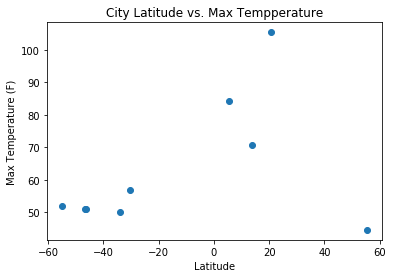

In [23]:

lat_temp_fig=plt.figure()

plt.scatter(city_list_df["Lat"],city_list_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Tempperature")


plt.show()

lat_temp_fig.savefig("scatter_lat_temp.png")


## Latitude vs. Humidity Plot

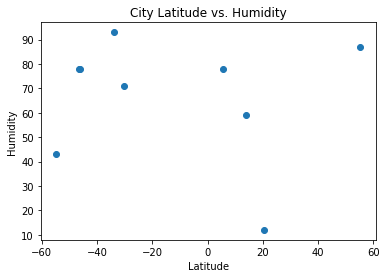

In [25]:
lat_humidity_fig=plt.figure()

plt.scatter(city_list_df["Lat"],city_list_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")


plt.show()

lat_humidity_fig.savefig("scatter_lat_humidity.png")



## Latitude vs. Cloudiness Plot

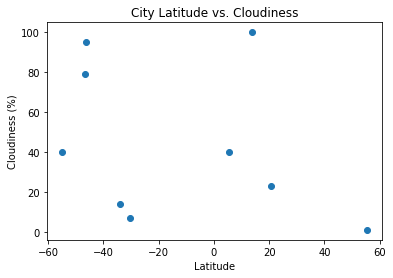

In [26]:
lat_cloud_fig=plt.figure()

plt.scatter(city_list_df["Lat"],city_list_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")


plt.show()

lat_cloud_fig.savefig("scatter_lat_cloudiness.png")







## Latitude vs. Wind Speed Plot

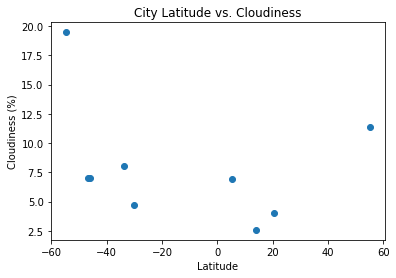

In [27]:
lat_wind_fig=plt.figure()

plt.scatter(city_list_df["Lat"],city_list_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

plt.show()

lat_wind_fig.savefig("scatter_lat_wind.png")






## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

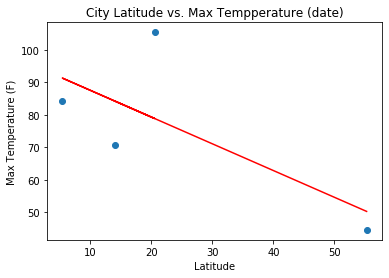

In [22]:
north_df=city_list_df.loc[(city_list_df["Lat"]>=0)]

nlat_temp_reg_fig=plt.figure()

plt.scatter(north_df["Lat"],north_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Tempperature")


(slope, intercept, rvalue, pvalue, stderr)= linregress(north_df["Lat"],north_df["Max Temp"])
regress_values= north_df["Lat"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(north_df["Lat"],regress_values,"r-")

plt.show()

nlat_temp_reg_fig.savefig("scatter_lat_temp_regression_north.png")






####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

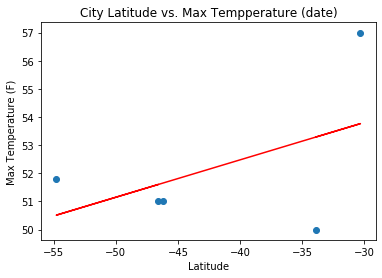

In [29]:

south_df=city_list_df.loc[(city_list_df["Lat"]<0)]

slat_temp_reg_fig=plt.figure()

plt.scatter(south_df["Lat"],south_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Tempperature")


(slope, intercept, rvalue, pvalue, stderr)= linregress(south_df["Lat"],south_df["Max Temp"])
regress_values= south_df["Lat"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(south_df["Lat"],regress_values,"r-")

plt.show()

slat_temp_reg_fig.savefig("scatter_lat_temp_regression_south.png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


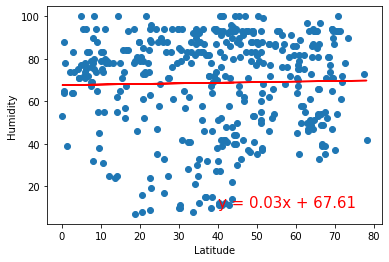

In [27]:

north_df=city_list_df.loc[(city_list_df["Lat"]>=0)]

nlat_humidity_reg_fig=plt.figure()

plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")


(slope, intercept, rvalue, pvalue, stderr)= linregress(north_df["Lat"],north_df["Humidity"])
regress_values= north_df["Lat"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(north_df["Lat"],regress_values,"r-")

plt.show()

nlat_humidity_reg_fig.savefig("scatter_lat_humidity_regression_north.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

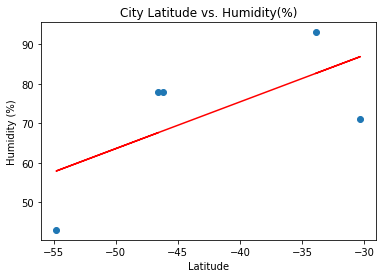

In [35]:

south_df=city_list_df.loc[(city_list_df["Lat"]<0)]

slat_hum_reg_fig=plt.figure()

plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity(%)")


(slope, intercept, rvalue, pvalue, stderr)= linregress(south_df["Lat"],south_df["Humidity"])
regress_values= south_df["Lat"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(south_df["Lat"],regress_values,"r-")

plt.show()

slat_hum_reg_fig.savefig("scatter_lat_hum_regression_south.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


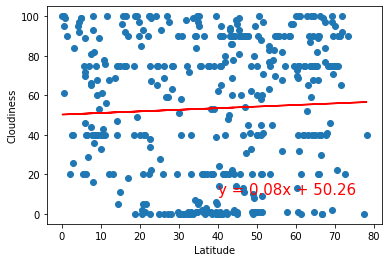

In [29]:

north_df=city_list_df.loc[(city_list_df["Lat"]>=0)]

nlat_cloud_reg_fig=plt.figure()

plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")


(slope, intercept, rvalue, pvalue, stderr)= linregress(north_df["Lat"],north_df["Cloudiness"])
regress_values= north_df["Lat"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(north_df["Lat"],regress_values,"r-")

plt.show()

nlat_cloud_reg_fig.savefig("scatter_lat_cloud_regression_north.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

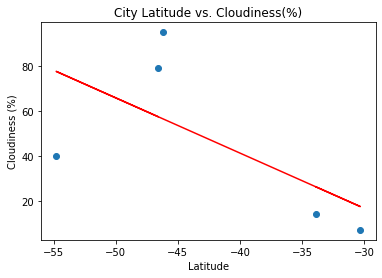

In [33]:
south_df=city_list_df.loc[(city_list_df["Lat"]<0)]

slat_cloud_reg_fig=plt.figure()

plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness(%)")


(slope, intercept, rvalue, pvalue, stderr)= linregress(south_df["Lat"],south_df["Cloudiness"])
regress_values= south_df["Lat"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(south_df["Lat"],regress_values,"r-")

plt.show()

slat_cloud_reg_fig.savefig("scatter_lat_cloud_regression_south.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


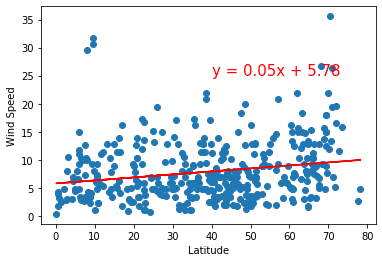

In [31]:
north_df=city_list_df.loc[(city_list_df["Lat"]>=0)]

nlat_wind_reg_fig=plt.figure()

plt.scatter(north_df["Lat"],north_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)")


(slope, intercept, rvalue, pvalue, stderr)= linregress(north_df["Lat"],north_df["Wind Speed"])
regress_values= north_df["Lat"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(north_df["Lat"],regress_values,"r-")

plt.show()

nlat_wind_reg_fig.savefig("scatter_lat_wind_regression_north.png")



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

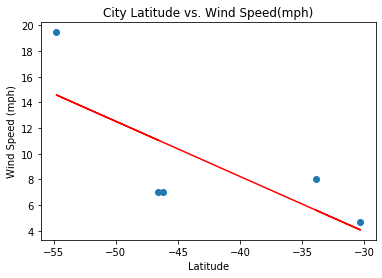

In [34]:
south_df=city_list_df.loc[(city_list_df["Lat"]<0)]

slat_wind_reg_fig=plt.figure()

plt.scatter(south_df["Lat"],south_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed(mph)")


(slope, intercept, rvalue, pvalue, stderr)= linregress(south_df["Lat"],south_df["Wind Speed"])
regress_values= south_df["Lat"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(south_df["Lat"],regress_values,"r-")

plt.show()

slat_wind_reg_fig.savefig("scatter_lat_wind_regression_south.png")